In [1]:

import _init_
from constants import *
from set_path import *
from config import *
from functions import *
import seaborn as sns

In [2]:
plt.rcParams['font.size']=42
plt.rcParams['axes.linewidth']=0.2
plt.rcParams['xtick.major.size']=4
plt.rcParams['xtick.minor.size']=2
plt.rcParams['xtick.major.width']=4.1
plt.rcParams['xtick.minor.width']=2.
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.major.size']=12
plt.rcParams['ytick.minor.size']=6
plt.rcParams['ytick.major.width']=2
plt.rcParams['ytick.minor.width']=2
plt.rcParams['ytick.direction']='in'

In [3]:
folder_list = [ 'SummitData/GasGravity/Production2pc/R8/', 'SummitData/GasGravity/Production2pc/R8-0.2Zsol/',\
               'SummitData/GasGravity/Production2pc/R4/', 'SummitData/GasGravity/Production2pc/R4-0.2Zsol/',\
               'SummitData/GasGravity/Production2pc/R4-h75-0.2Zsol',\
                  'SetonixData/R16/4pc/', 'SetonixData/R16-0.2Zsol/',\
              'SummitData/GasGravity/Production2pc/R16-h300-Zsol/']
data_path0 = os.path.join('/g/data/jh2/av5889/quokka_myrepo/quokka/sims/', folder_list[0])

In [36]:
kk = 0 
sigma_sfr = [6.e-5/yr_to_sec , 6.e-5/yr_to_sec , 0.000398107/yr_to_sec,  0.000398107/yr_to_sec, 1.58e-6/yr_to_sec]   

folder = folder_list[5]

data_path = os.path.join('/g/data/jh2/av5889/quokka_myrepo/quokka/sims/', folder)

os.chdir(data_path)
# list_file = glob.glob("proj_y_plt*/")
list_file = ['proj_y_plt70000/']
Zunit = Msun/1.e3
os.chdir(data_path)
infile   = os.path.join(data_path, 'metal_uniform.in')

dom_min, dom_max, ncells = getdomain(infile)
fac = 1
zrange = np.linspace(dom_min[2], dom_max[2], (fac*int(ncells[2])))
xrange = np.linspace(dom_min[0], dom_max[0], (fac*int(ncells[0])))
yrange = np.linspace(dom_min[1], dom_max[1], (fac*int(ncells[1])))


dx = (dom_max[0]- dom_min[0])/(fac*int(ncells[0]))


max_time=0.0
i=0
k=0
for f in list_file:
    inputfile = os.path.join(data_path, f)

    ds   = yt.load(inputfile)
    data = ds.covering_grid(level=0, left_edge=dom_min, dims=ds.domain_dimensions, num_ghost_zones=0)
    print(inputfile)
    curr_timestep = ds.current_time.to('Myr')
    if(curr_timestep>max_time):
        
       
        tot_rho = np.array(data['rho'])[:,0,:] 
        tot_scal = np.array(data['scalar'])[:,0,:]*Zunit
        
        Ztot =  (tot_scal/tot_rho)
        
        k=i
        max_time= curr_timestep
    i+=1 

print('Max timestep =', max_time,k)

yt : [INFO     ] 2024-10-09 19:56:32,371 Parameters: current_time              = 1176871975974538.5
yt : [INFO     ] 2024-10-09 19:56:32,373 Parameters: domain_dimensions         = [ 256    1 4096]
yt : [INFO     ] 2024-10-09 19:56:32,374 Parameters: domain_left_edge          = [ 0.0000e+00  0.0000e+00 -2.4144e+22]
yt : [INFO     ] 2024-10-09 19:56:32,376 Parameters: domain_right_edge         = [3.0180e+21 3.0180e+21 2.4144e+22]


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SetonixData/R16/4pc/proj_y_plt70000/
Max timestep = 37.29282252055094 Myr 0


/jobfs/126485590.gadi-pbs/ipykernel_1024408/3552268576.py:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plot = ax[0].pcolormesh(xrange/kpc,zrange/kpc, np.transpose(tot_scal/tot_rho),\
/jobfs/126485590.gadi-pbs/ipykernel_1024408/3552268576.py:32: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plot = ax[1].pcolormesh(xrange/kpc,zrange/kpc, np.transpose(tot_rho)/mp,\


Text(1.2, 0.5, ' $\\mathrm{N}_H $ [cm$^{-2}$]')

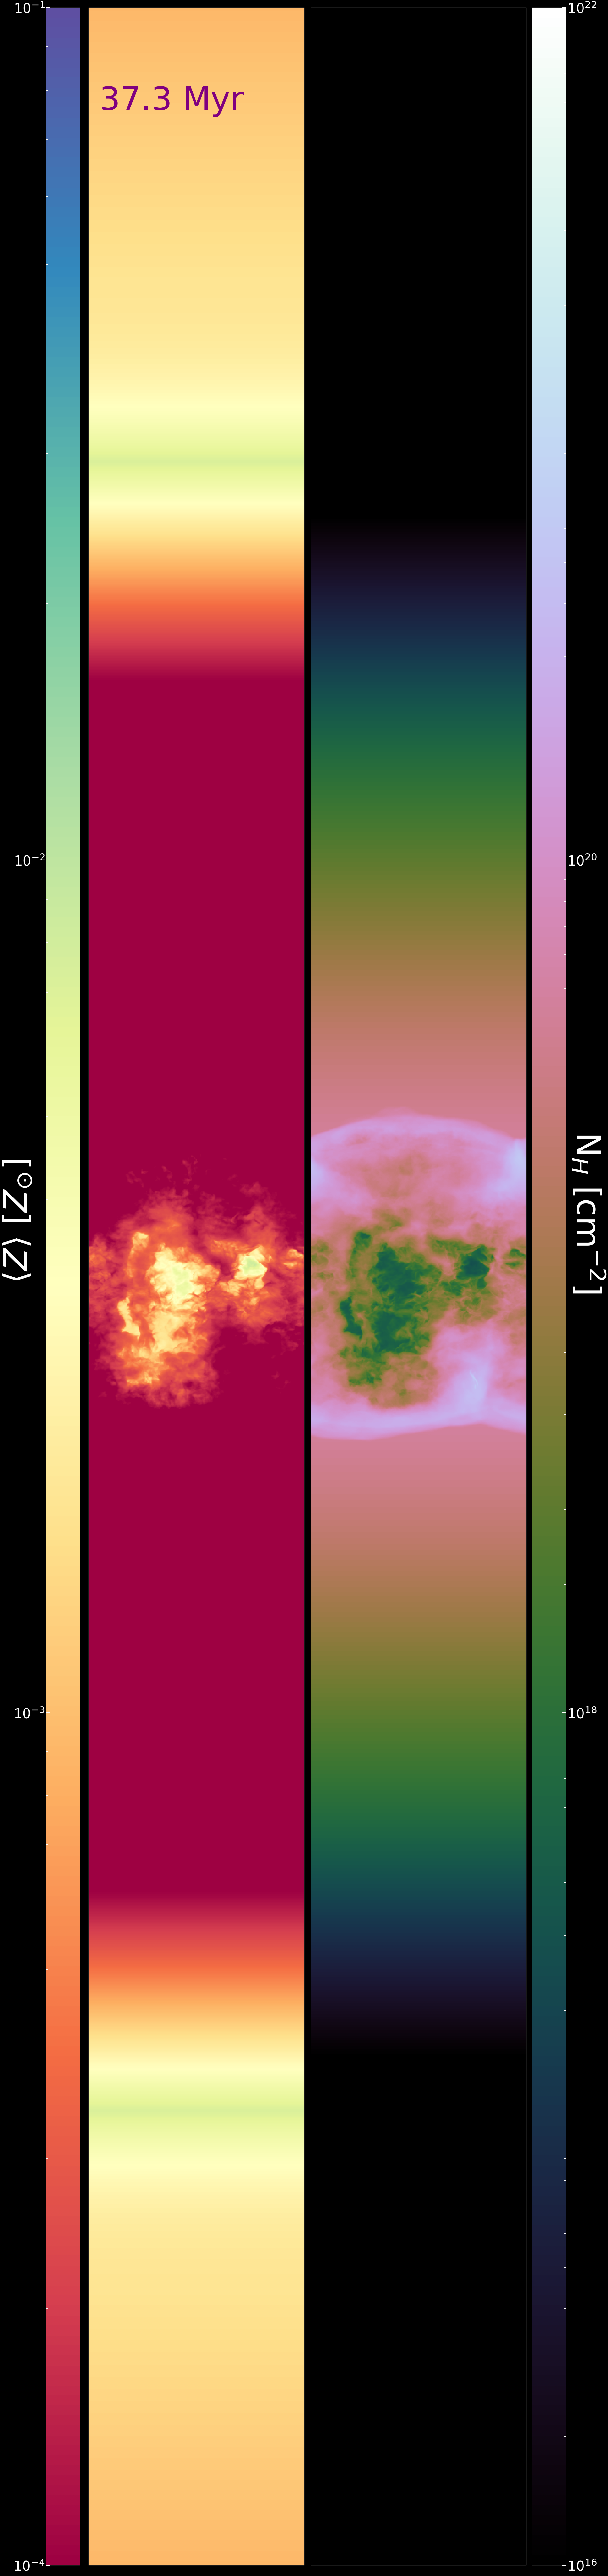

In [40]:
fig, ax = plt.subplots(1, 2, gridspec_kw = {'wspace':0.03, 'hspace':0.0},figsize=(24, 144))
i=0
plt.style.use('dark_background')

cbarx = 0.05
cbheight = 0.755
cbary = 0.125
cblen = 0.06
dx1 = 0.86
dx2 = 0.8
cbtitlex = 0.15
cbtitley = 16.5



plot = ax[0].pcolormesh(xrange/kpc,zrange/kpc, np.transpose(tot_scal/tot_rho),\
                    norm=mcolors.LogNorm(vmin=1.e-4, vmax=1.e-1),
                    cmap=sns.color_palette("Spectral", as_cmap=True))
cax = fig.add_axes([cbarx, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='vertical', ticks=(1.e-4, 1.e-3, 1.e-2, 1.e-1))
cax.xaxis.set_tick_params(rotation=45, labelleft=True, left=True, right=False)
cax.xaxis.set_ticks_position('both')
cax.yaxis.set_ticks_position('left')



ax[0].tick_params(axis='y', labelleft=False, labelright=False, right=False, left=False)
ax[0].tick_params(axis='x', labelbottom=False, bottom=False)
ax[0].text(0.05,0.96, '%.1f'%(max_time) + ' Myr', color='purple', transform=ax[0].transAxes, fontsize=100)
ax[0].text(-0.4,0.5, r" $\langle Z \rangle $ [$Z_{\odot}$]", color='white', transform=ax[0].transAxes, fontsize=100, rotation=90)

plot = ax[1].pcolormesh(xrange/kpc,zrange/kpc, np.transpose(tot_rho)/mp,\
                    norm=mcolors.LogNorm(vmin=1.e16, vmax=1.e22),
                    cmap=sns.color_palette("cubehelix", as_cmap=True))
cax = fig.add_axes([cbarx+dx1, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='vertical', ticks=(1.e16, 1.e18, 1.e20, 1.e22))
cax.xaxis.set_ticks_position('top')
cax.xaxis.set_tick_params(rotation=45)
cax.xaxis.set_ticks_position('bottom')


ax[1].tick_params(axis='y', labelleft=False, labelright=False, right=False, left=False)
ax[1].tick_params(axis='x', labelbottom=False, bottom=False)
ax[1].text(1.2,0.5, r" $\mathrm{N}_H $ [cm$^{-2}$]", color='white', transform=ax[1].transAxes, fontsize=100, rotation=270)

# plt.setp(ax, 'ylim', (0.0, 6.0))

/jobfs/123014119.gadi-pbs/ipykernel_139368/3441825184.py:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plot = ax.pcolormesh(xrange/kpc,zrange/kpc, np.transpose(tot_scal/tot_rho),\


[-0.5, 0.5]

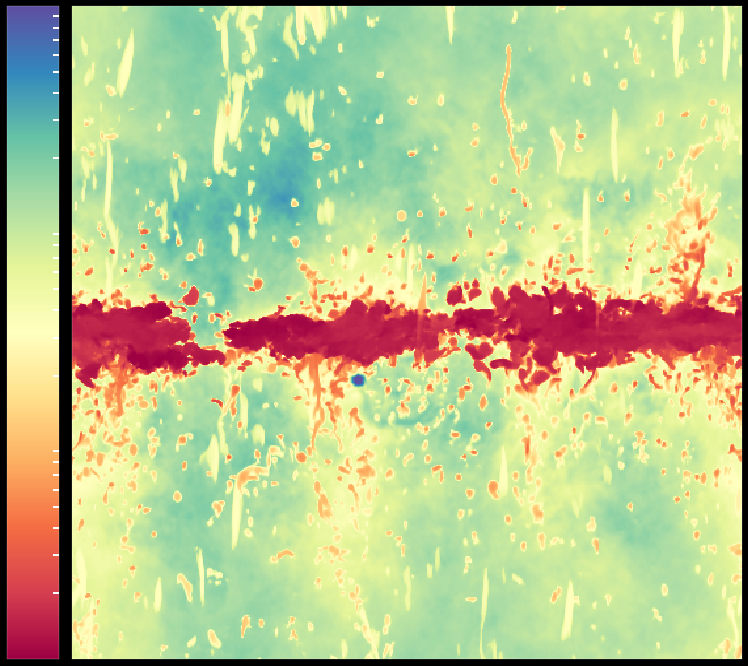

In [44]:
fig, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.00, 'hspace':0.0},figsize=(12, 12))
i=0
plt.style.use('dark_background')

cbarx = 0.05
cbheight = 0.755
cbary = 0.125
cblen = 0.06
dx1 = 0.86
dx2 = 0.8
cbtitlex = 0.15
cbtitley = 16.5


zmax = np.amax(tot_scal/tot_rho)
zmin = np.amin(tot_scal/tot_rho)


plot = ax.pcolormesh(xrange/kpc,zrange/kpc, np.transpose(tot_scal/tot_rho),\
                    norm=mcolors.LogNorm(vmin=1.e-4, vmax=1.e-1),
                    cmap=sns.color_palette("Spectral", as_cmap=True))
cax = fig.add_axes([cbarx, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='vertical', ticks=())
cax.xaxis.set_ticks_position('top')
cax.xaxis.set_tick_params(rotation=45)
cax.xaxis.set_ticks_position('bottom')


ax.tick_params(axis='y', labelleft=False, labelright=False, right=False, left=False)
# ax.text(0.05,0.2, '%.1f'%(max_time) + ' Myr', color='white')

ax.tick_params(axis='x', labelbottom=False, bottom=False)
plt.setp(ax, 'ylim', (-0.5, 0.5))



In [ ]:
 '16 LEVEL', '16 LEVEL_r', 'Accent', 'Accent_r', 'B-W LINEAR', 'B-W LINEAR_r', 'BLUE', 'BLUE-RED', 'BLUE-RED_r',
    'BLUE_r', 'Beach', 'Beach_r', 'Blue - Pastel - Red', 'Blue - Pastel - Red_r', 'Blue Waves', 'Blue Waves_r', 
    'Blue-Red', 'Blue-Red_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 
    'CMRmap_r', 'Dark2', 'Dark2_r', 'Eos A', 'Eos A_r', 'Eos B', 'Eos B_r', 'GREEN', 'GREEN-PINK', 'GREEN-PINK_r',
    'GREEN_r', 'GRN', 'GRN-RED-BLU-WHT', 'GRN-RED-BLU-WHT_r', 'GRN_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 
    'Greys', 'Greys_r', 'Hardcandy', 'Hardcandy_r', 'Haze', 'Haze_r', 'Hue Sat Lightness 1', 'Hue Sat Lightness 1_r',
    'Hue Sat Lightness 2', 'Hue Sat Lightness 2_r', 'Hue Sat Value 1', 'Hue Sat Value 1_r', 'Hue Sat Value 2',
    'Hue Sat Value 2_r', 'Mac Style', 'Mac Style_r', 'Nature', 'Nature_r', 'Ocean', 'Ocean_r', 'OrRd', 'OrRd_r',
    'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'PRISM', 'PRISM_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 
    'Pastel2', 'Pastel2_r', 'Pastels', 'Pastels_r', 'Peppermint', 'Peppermint_r', 'PiYG', 'PiYG_r', 'Plasma', 
    'Plasma_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purple-Red + Stripes',
    'Purple-Red + Stripes_r', 'Purples', 'Purples_r', 'RAINBOW', 'RAINBOW_r', 'RED TEMPERATURE', 'RED TEMPERATURE_r',
    'RED-PURPLE', 'RED-PURPLE_r', 'Rainbow', 'Rainbow + black', 'Rainbow + black_r', 'Rainbow + white', 
    'Rainbow + white_r', 'Rainbow18', 'Rainbow18_r', 'Rainbow_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 
    'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'STD GAMMA-II', 'STD GAMMA-II_r', 
    'STEPS', 'STEPS_r', 'STERN SPECIAL', 'STERN SPECIAL_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 
    'Spectral', 'Spectral_r', 'Volcano', 'Volcano_r', 'Waves', 'Waves_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 
    'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'algae', 'algae_r',
    'arbre', 'arbre_r', 'autumn', 'autumn_r', 'bds_highcontrast', 'bds_highcontrast_r', 'binary', 'binary_r',
    'black_blueish', 'black_blueish_r', 'black_green', 'black_green_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr',
    'bwr_r', 'cividis', 'cividis_r', 'cmyt.algae', 'cmyt.algae_r', 'cmyt.arbre', 'cmyt.arbre_r', 'cmyt.dusk', 
    'cmyt.dusk_r', 'cmyt.kelp', 'cmyt.kelp_r', 'cmyt.octarine', 'cmyt.octarine_r', 'cmyt.pastel', 'cmyt.pastel_r', 
    'cmyt.pixel_blue', 'cmyt.pixel_blue_r', 'cmyt.pixel_green', 'cmyt.pixel_green_r', 'cmyt.pixel_red', 
    'cmyt.pixel_red_r', 'cmyt.xray', 'cmyt.xray_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r',
    'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'doom', 'doom_r', 'dusk', 'dusk_r',
    'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 
    'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 
    'gist_yarg', 
'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r',
'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 
'icefire_r', 'idl00', 'idl00_r', 'idl01', 'idl01_r', 'idl02',
'idl02_r', 'idl03', 'idl03_r', 'idl04', 'idl04_r', 'idl05', 'idl05_r', 
'idl06', 'idl06_r', 'idl07', 'idl07_r', 'idl08', 'idl08_r', 'idl09', 'idl09_r', 
'idl10', 'idl10_r', 'idl11', 'idl11_r', 'idl12', 'idl12_r', 'idl13', 'idl13_r', 'idl14',
'idl14_r', 'idl15', 'idl15_r', 'idl16', 'idl16_r', 'idl17', 'idl17_r', 'idl18', 'idl18_r', 'idl19', 'idl19_r', 
'idl20', 'idl20_r', 'idl21', 'idl21_r', 'idl22', 'idl22_r', 'idl23', 'idl23_r', 'idl24', 'idl24_r', 'idl25', 
'idl25_r', 'idl26', 'idl26_r', 'idl27', 'idl27_r', 'idl28', 'idl28_r', 'idl29', 'idl29_r', 'idl30', 'idl30_r',
'idl31', 'idl31_r', 'idl32', 'idl32_r', 'idl33', 'idl33_r', 'idl34', 'idl34_r', 'idl35', 'idl35_r', 'idl36', 
'idl36_r', 'idl37', 'idl37_r', 'idl38', 'idl38_r', 'idl39', 'idl39_r', 'idl40', 'idl40_r', 'inferno',
'inferno_r', 'jet', 'jet_r', 'kamae', 'kamae_r', 'kelp', 'kelp_r', 'magma', 'magma_r', 'mako', 'mako_r',
'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'octarine', 'octarine_r',
'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'purple_mm', 'purple_mm_r', 
'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r',
'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c',
'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted',
'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'